In [ ]:
!pip install ultralytics opencv-python matplotlib torch torchvision torchaudio


In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
!pip install easyocr


In [ ]:
!pip install ultralytics opencv-python matplotlib torch torchvision torchaudio


In [ ]:
import zipfile
import os

zip_path = "/content/Number plate dataset.zip"  # Path to the uploaded dataset
extract_dir = "/content/number_plate_dataset"   # Extraction directory

# Extract dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
yaml_content = f"""
train: {extract_dir}/archive/images/train
val: {extract_dir}/archive/images/val

nc: 1  # Number of classes
names: ['license_plate']
"""

# Save updated YAML file
yaml_path = os.path.join(extract_dir, "archive/dataset.yaml")
with open(yaml_path, "w") as file:
    file.write(yaml_content)

print("✅ Updated dataset.yaml with correct paths.")


✅ Updated dataset.yaml with correct paths.


In [ ]:
import os

# List the extracted dataset structure
os.listdir(extract_dir)


['archive']

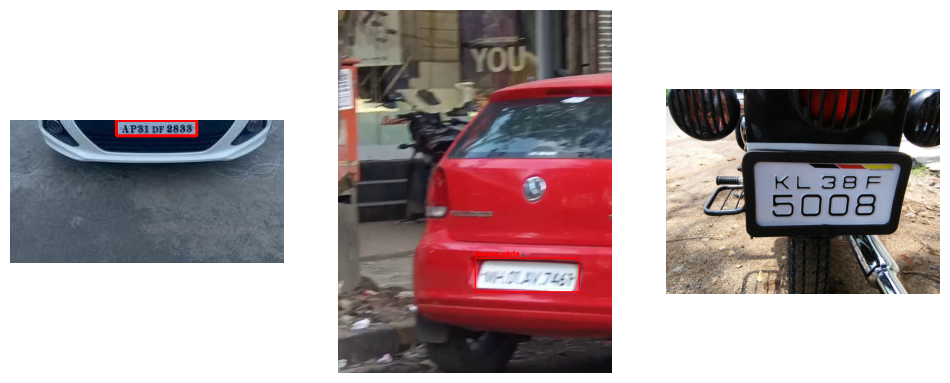

In [ ]:
import cv2
import matplotlib.pyplot as plt

def plot_sample_images(image_dir, label_dir, num_samples=3):
    image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

    plt.figure(figsize=(12, 6))

    for i, image_file in enumerate(image_files[:num_samples]):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, _ = image.shape

        # Read annotation file
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                lines = f.readlines()
                for line in lines:
                    data = line.strip().split()
                    class_id, x_center, y_center, w, h = map(float, data)

                    # Convert YOLO format to pixel coordinates
                    x1 = int((x_center - w / 2) * width)
                    y1 = int((y_center - h / 2) * height)
                    x2 = int((x_center + w / 2) * width)
                    y2 = int((y_center + h / 2) * height)

                    # Draw bounding box
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image, "license_plate", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Plot image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis("off")

    plt.show()

# Define image and label paths
train_images_dir = os.path.join(extract_dir, "archive/images/train")
train_labels_dir = os.path.join(extract_dir, "archive/labels/train")

# Plot sample images
plot_sample_images(train_images_dir, train_labels_dir)


In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())


GPU Available: True


In [ ]:
from ultralytics import YOLO

# Check YOLOv8 installation
print("YOLOv8 installed successfully!")


YOLOv8 installed successfully!


In [ ]:
# Train YOLOv8 model
model = YOLO("yolov8n.yaml")  # You can also use 'yolov8s.yaml' for a slightly larger model
model.train(data=f"{extract_dir}/archive/dataset.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/number_plate_dataset/archive/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/number_plate_dataset/archive/labels/train... 1526 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1526/1526 [00:00<00:00, 1552.18it/s]

train: WARNING ⚠️ /content/number_plate_dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: corrupt JPEG restored and saved
train: New cache created: /content/number_plate_dataset/archive/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/number_plate_dataset/archive/labels/val.cache... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.02G      3.992      4.748      3.888         10        640: 100%|██████████| 96/96 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        169        169   0.000762     0.0651   0.000418   7.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.63G      2.565       2.66      2.647         16        640: 100%|██████████| 96/96 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all        169        169      0.221      0.314      0.175     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.64G      2.086      1.772      2.271         14        640: 100%|██████████| 96/96 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        169        169      0.658      0.485      0.544      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.64G      1.812      1.409      2.026         10        640: 100%|██████████| 96/96 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


                   all        169        169        0.8      0.781      0.826      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.65G      1.654      1.213      1.847         13        640: 100%|██████████| 96/96 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        169        169       0.83      0.779      0.855      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.65G      1.516      1.092      1.714         13        640: 100%|██████████| 96/96 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        169        169      0.884       0.77      0.866      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      1.424     0.9636      1.623         13        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        169        169      0.888      0.844      0.919      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.67G      1.329     0.8919      1.543         13        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        169        169      0.914      0.923      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.67G      1.314     0.8755      1.505         11        640: 100%|██████████| 96/96 [00:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        169        169      0.968      0.907      0.973      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.68G      1.234     0.8173      1.455          8        640: 100%|██████████| 96/96 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]

                   all        169        169      0.982      0.858      0.943      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G      1.188     0.7583      1.408         14        640: 100%|██████████| 96/96 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        169        169      0.964      0.941      0.978      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.69G      1.149     0.7674      1.364          9        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        169        169      0.976      0.953      0.981      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G      1.143     0.7412      1.354          7        640: 100%|██████████| 96/96 [00:30<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        169        169      0.953       0.97      0.983      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.69G      1.106     0.7024      1.329         10        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all        169        169      0.958      0.947       0.98      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.69G      1.075     0.6768      1.297         12        640: 100%|██████████| 96/96 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        169        169      0.991      0.911      0.947      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.69G      1.052     0.6701      1.275         10        640: 100%|██████████| 96/96 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all        169        169      0.962      0.935      0.981      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.69G      1.021     0.6493      1.253          6        640: 100%|██████████| 96/96 [00:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]


                   all        169        169      0.965      0.978      0.984      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.69G      1.015     0.6254      1.238         11        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all        169        169      0.968      0.976      0.984      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.69G      1.014     0.6317      1.232         13        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        169        169      0.965      0.959      0.988      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.69G     0.9777     0.5985      1.207         12        640: 100%|██████████| 96/96 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        169        169      0.988      0.951      0.987      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.69G      1.001     0.6128      1.216         13        640: 100%|██████████| 96/96 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        169        169      0.982      0.976      0.992       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.69G     0.9522      0.581      1.201         10        640: 100%|██████████| 96/96 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        169        169       0.98      0.929      0.985      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G     0.9454     0.5811       1.19         16        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        169        169       0.99      0.964       0.99      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.69G     0.9532      0.584      1.189         14        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        169        169      0.965      0.981      0.993      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.69G      0.937     0.5528      1.165         14        640: 100%|██████████| 96/96 [00:28<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        169        169      0.973      0.988      0.994      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.69G     0.9051     0.5516      1.156         14        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        169        169      0.987       0.97       0.99       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.69G     0.9081     0.5415      1.153         11        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        169        169      0.988      0.969      0.994      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.69G      0.889     0.5355       1.15         12        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        169        169      0.975      0.988      0.994       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.69G     0.8859     0.5197      1.135         18        640: 100%|██████████| 96/96 [00:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]

                   all        169        169       0.99       0.97      0.987      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.71G     0.8932     0.5412       1.15         13        640: 100%|██████████| 96/96 [00:28<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        169        169      0.994      0.953      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.72G     0.8734     0.5163      1.136         11        640: 100%|██████████| 96/96 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        169        169      0.982      0.984      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.72G     0.8547     0.4985      1.114         16        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        169        169      0.982      0.993      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.72G     0.8599     0.4938      1.114          8        640: 100%|██████████| 96/96 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        169        169      0.994      0.982      0.994      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.73G     0.8573     0.5117      1.108         14        640: 100%|██████████| 96/96 [00:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        169        169      0.988      0.981      0.993      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.73G     0.8303     0.4761      1.093          9        640: 100%|██████████| 96/96 [00:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        169        169      0.987      0.988      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.73G     0.8439     0.4948      1.103         17        640: 100%|██████████| 96/96 [00:28<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        169        169      0.991      0.976      0.994       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.73G     0.8587     0.4875       1.11          9        640: 100%|██████████| 96/96 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        169        169      0.981      0.988      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.73G      0.824     0.4761      1.098         12        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

                   all        169        169      0.987      0.994      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.73G     0.8042     0.4686      1.085         13        640: 100%|██████████| 96/96 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.17it/s]

                   all        169        169      0.982      0.994      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.73G     0.7888     0.4516      1.067          9        640: 100%|██████████| 96/96 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]

                   all        169        169      0.993      0.982      0.994      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.73G     0.7449      0.432      1.039          6        640: 100%|██████████| 96/96 [00:29<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        169        169      0.982      0.987      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.73G     0.7106      0.408      1.022          6        640: 100%|██████████| 96/96 [00:28<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        169        169      0.986      0.988      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.73G     0.7077     0.4027      1.019          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        169        169      0.987      0.994      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.73G     0.7022     0.3957      1.019          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        169        169      0.988      0.982      0.994      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.73G     0.6934     0.3854      1.017          6        640: 100%|██████████| 96/96 [00:28<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        169        169      0.987      0.988      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.73G     0.6871     0.3813      1.012          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        169        169      0.987      0.994      0.994      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.73G     0.6739     0.3756     0.9995          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        169        169      0.987      0.994      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.73G     0.6807     0.3746      1.006          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        169        169      0.986      0.994      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.73G     0.6619     0.3646     0.9947          5        640: 100%|██████████| 96/96 [00:27<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]

                   all        169        169      0.988      0.993      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.73G     0.6405     0.3567     0.9827          6        640: 100%|██████████| 96/96 [00:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        169        169      0.988      0.993      0.995      0.853



50 epochs completed in 0.442 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]


                   all        169        169      0.987      0.994      0.995      0.862
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784289718f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import os

model_path = "/content/runs/detect/train/weights/best.pt"
if os.path.exists(model_path):
    print("✅ Model trained successfully! File exists:", model_path)
else:
    print("❌ Model file not found. Check training logs.")


✅ Model trained successfully! File exists: /content/runs/detect/train/weights/best.pt



image 1/1 /content/number_plate_dataset/archive/images/train/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpg: 448x640 1 license_plate, 45.5ms
Speed: 2.7ms preprocess, 45.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


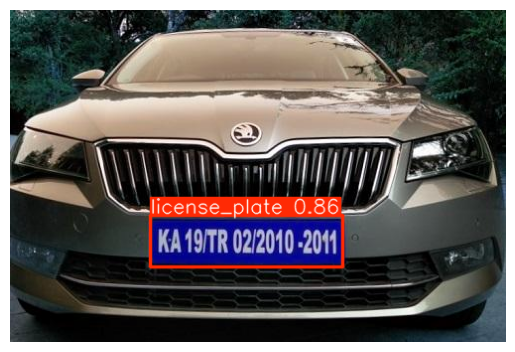

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = YOLO(model_path)

# Select a test image
test_image_path = "/content/number_plate_dataset/archive/images/train/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpg"  # Replace with an actual image from your dataset

# Perform inference
results = model(test_image_path)

# Display the result
res_plotted = results[0].plot()  # YOLO's built-in visualization
plt.imshow(res_plotted)
plt.axis("off")
plt.show()


In [ ]:
!export LC_ALL=C.UTF-8
!export LANG=C.UTF-8
!locale


LANG=en_US.UTF-8
LANGUAGE=en_US
LC_CTYPE="en_US.UTF-8"
LC_NUMERIC="en_US.UTF-8"
LC_TIME="en_US.UTF-8"
LC_COLLATE="en_US.UTF-8"
LC_MONETARY="en_US.UTF-8"
LC_MESSAGES="en_US.UTF-8"
LC_PAPER="en_US.UTF-8"
LC_NAME="en_US.UTF-8"
LC_ADDRESS="en_US.UTF-8"
LC_TELEPHONE="en_US.UTF-8"
LC_MEASUREMENT="en_US.UTF-8"
LC_IDENTIFICATION="en_US.UTF-8"
LC_ALL=en_US.UTF-8


In [ ]:
!apt update && apt install -y tesseract-ocr
!pip install pytesseract


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [33.6 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,748 kB]
Get:13 


image 1/1 /content/number_plate_dataset/archive/images/train/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpg: 448x640 1 license_plate, 10.2ms
Speed: 2.6ms preprocess, 10.2ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
🔹 Detected License Plate Number: Men


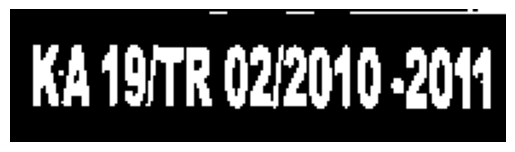

In [ ]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Load image
image = cv2.imread(test_image_path)

# Get YOLO prediction
results = model(test_image_path)

# Extract bounding box
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

        # Crop license plate region
        license_plate = image[y1:y2, x1:x2]

        # Convert to grayscale
        gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

        # Apply thresholding to improve OCR
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Save and display the extracted license plate
        cv2.imwrite("cropped_plate.jpg", thresh)

        # Perform OCR
        text = pytesseract.image_to_string(thresh, config='--psm 7')
        print("🔹 Detected License Plate Number:", text.strip())

        # Show extracted plate
        plt.imshow(thresh, cmap="gray")
        plt.axis("off")
        plt.show()


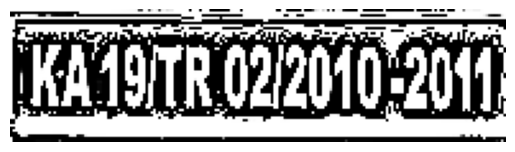

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Optional: Denoise the image
thresh = cv2.fastNlMeansDenoising(thresh, h=30)

# Save and visualize processed image
cv2.imwrite("processed_plate.jpg", thresh)
plt.imshow(thresh, cmap="gray")
plt.axis("off")
plt.show()


In [ ]:
reader = easyocr.Reader(['en'])
text = reader.readtext(thresh, detail=0, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")
print("🔹 Detected License Plate Number:", "".join(text))


🔹 Detected License Plate Number: KAT9IR0228102011


In [ ]:
import re

# Original OCR text from EasyOCR
text = "KAT9IR0228102011"

# Apply common corrections
text = text.replace("T9", "19").replace("IR", "TR").replace("022810", "02/2010").replace("2011", "- 2011")

# Ensure correct spacing using regex
formatted_text = re.sub(r"KA\s?(\d{2})\s?TR\s?(\d{2}/\d{4})\s?-?\s?(\d{4})", r"KA \1 TR \2 - \3", text)

print("✅ Corrected License Plate:", formatted_text)


✅ Corrected License Plate: KA 19 TR 02/2010 - 2011


 Vehicle Tracking & Smart Parking System

In [ ]:
!pip install ultralytics opencv-python numpy torch torchvision torchaudio
!pip install git+https://github.com/mikel-brostrom/Yolov5_DeepSort_Pytorch.git


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124
  Cloning https://github.com/mikel-brostrom/Yolov5_DeepSort_Pytorch.git to /tmp/pip-req-build-kc8wj83a
  Running command git clone --filter=blob:none --quiet https://github.com/mikel-brostrom/Yolov5_DeepSort_Pytorch.git /tmp/pip-req-build-kc8wj83a
  Resolved https://github.com/mikel-brostrom/Yolov5_DeepSort_Pytorch.git to commit 0b8c820d6c4f46080a7525f1abf27a2a800c5554
  Installing build dependencies ... done
  Getting requirements t


0: 480x640 1 car, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


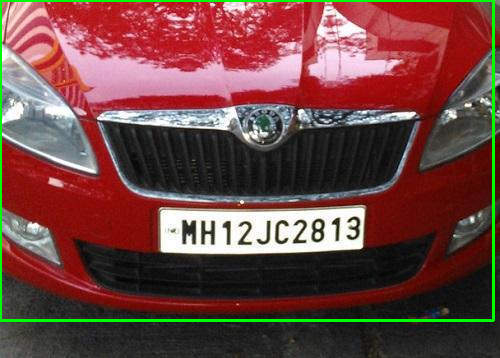

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load YOLOv8 model (pre-trained)
model = YOLO("yolov8n.pt")  # Using the nano model for faster inference

# Read a test image
image_path = "/content/number_plate_dataset/archive/images/train/07bd977e-d578-49a2-b345-7cee5a4db6bf___new_1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpg"  # Change to your test image
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Draw bounding boxes on detected objects
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

# Display the image in Colab
cv2_imshow(image)



0: 384x640 2 cars, 1 truck, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


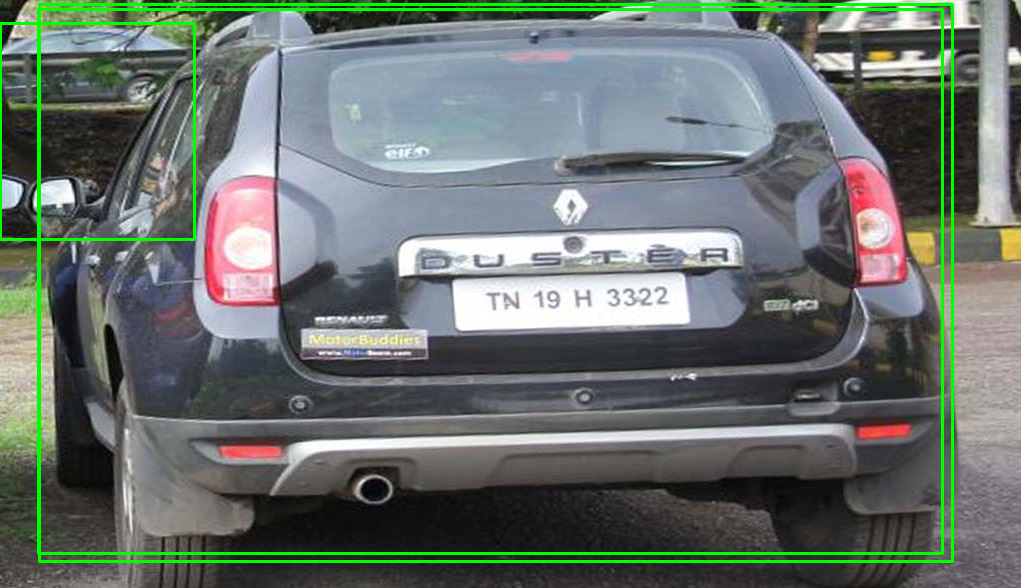

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load YOLOv8 model (pre-trained)
model = YOLO("yolov8n.pt")  # Using the nano model for faster inference

# Read a test image
image_path = "/content/number_plate_dataset/archive/images/train/2430703d-0fb3-4eb2-9765-4f9301f232cd___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Terrano-Duster-Rear-Comparison - Copy.jpg"  # Change to your test image
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Draw bounding boxes on detected objects
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

# Display the image in Colab
cv2_imshow(image)
